In [ ]:
!python3 -c "import tensorflow as tf; print(tf.reduce_sum(tf.random.normal([99, 99])))"

2021-05-31 16:24:53.839804: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2021-05-31 16:24:55.567830: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2021-05-31 16:24:55.649668: E tensorflow/stream_executor/cuda/cuda_driver.cc:328] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2021-05-31 16:24:55.649758: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (fa7214bc752a): /proc/driver/nvidia/version does not exist
tf.Tensor(-40.86964, shape=(), dtype=float32)


In [ ]:
import tensorflow as tf
print(tf.__version__)

2.5.0


In [ ]:
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


False

In [ ]:
if tf.test.gpu_device_name() == '/device:GPU:0':
  print("Using a GPU")
else:
  print("Using a CPU")

Using a GPU


In [ ]:
import tensorflow as tf
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 4024254152465233954
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 10780885942879961341
physical_device_desc: "device: XLA_GPU device"
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 12567651201342837307
physical_device_desc: "device: XLA_CPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 15651091252
locality {
  bus_id: 1
  links {
  }
}
incarnation: 10922718326167081695
physical_device_desc: "device: 0, name: Tesla V100-PCIE-16GB, pci bus id: 0000:03:00.0, compute capability: 7.0"
]


In [ ]:
with tf.device('/device:GPU:0'):
  a = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], shape=[2, 3], name='a')
  b = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], shape=[3, 2], name='b')
  c = tf.matmul(a, b)
# Creates a session with log_device_placement set to True.
sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))
# Runs the op.
print(sess.run(c))

2021-05-31 14:28:57.251221: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-05-31 14:28:57.251287: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2021-05-31 14:28:57.251311: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (DMED7596): /proc/driver/nvidia/version does not exist
2021-05-31 14:28:57.251747: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


AttributeError: module 'tensorflow' has no attribute 'Session'

In [ ]:
# Creates a graph.
a = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], shape=[2, 3], name='a')
b = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], shape=[3, 2], name='b')
c = tf.matmul(a, b)
# Creates a session with log_device_placement set to True.
sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))
# Runs the op.
print(sess.run(c))

AttributeError: module 'tensorflow' has no attribute 'Session'

In [ ]:
#!pwd

In [ ]:
import pandas as pd
data = pd.read_csv("HeLa/ayu/new/P value 0.05.csv")
data.head(2)
data.shape

FileNotFoundError: [Errno 2] No such file or directory: 'HeLa/ayu/new/P value 0.05.csv'

In [ ]:
df=pd.DataFrame(data)
X = df.iloc[:, :32]
y = df.iloc[:, 33]

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(y)
list(le.classes_)
values=le.transform(y)
print(values)

[2 2 2 2 2 2 2 2 1 1 1 1 0 0 0 0 0 0 0]


In [ ]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(le.transform(y).reshape(-1,1))
enc.categories_
#print(enc.transform(le.transform(y).reshape(-1,1)))

[array([0, 1, 2])]

In [ ]:
#print(np.array(tf.one_hot(le.transform(y), depth=3)))
#vocabulary_feature_column =  tf.feature_column.categorical_column_with_vocabulary_list(key=["P", "V", "K"],vocabulary_list=["P", "V", "K"])
import numpy as np
n_values = np.max(values) + 1
Y=np.eye(n_values)[values]

In [ ]:
#Y=pd.DataFrame(np.array(tf.one_hot(le.transform(y), depth=3)))
Y=pd.DataFrame(Y)
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state = 0)
X_train.to_csv("X_train.csv", index = False, header = None)
X_test.to_csv("X_test.csv", index = False, header = None)
Y_train.to_csv("Y_train.csv", index = False, header = None)
Y_test.to_csv("Y_test.csv", index = False, header = None)
Y_test.head()

,0,1,2
10,0.0,1.0,0.0
1,0.0,0.0,1.0


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train.shape[1],Y_train.shape[1] 

/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


(32, 3)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [ ]:
classifier = Sequential()
classifier.add(Dense(units = 9, activation = 'relu', input_dim=X_train.shape[1]))
classifier.add(Dense(units = 6, activation = 'relu'))
classifier.add(Dense(units = Y_train.shape[1] , activation = 'sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.


In [ ]:
classifier.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

In [ ]:
classifier.fit(X_train, Y_train, batch_size = X_train.shape[1],epochs = 100)

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
17/17 [==============================] - 1s 68ms/step - loss: 0.3649 - acc: 0.1176
Epoch 2/100
17/17 [==============================] - 0s 195us/step - loss: 0.3613 - acc: 0.1176
Epoch 3/100
17/17 [==============================] - 0s 179us/step - loss: 0.3578 - acc: 0.1765
Epoch 4/100
17/17 [==============================] - 0s 167us/step - loss: 0.3544 - acc: 0.1765
Epoch 5/100
17/17 [==============================] - 0s 160us/step - loss: 0.3510 - acc: 0.1765
Epoch 6/100
17/17 [==============================] - 0s 156us/step - loss: 0.3479 - acc: 0.2353
Epoch 7/100
17/17 [==============================] - 0s 158us/step - loss: 0.3450 - acc: 0.2353
Epoch 8/100
17/17 [==============================] - 0s 163us/step - loss: 0.3422 - acc: 0.2353
Epoch 9/100
17/17 [==============================] - 0s 160us/step - loss: 0.3393 - acc: 0.2353
Epoch 10/100
17/17 [==============================] - 0s 167us/step - loss: 0.3365 - acc:

In [ ]:
Y_pred = classifier.predict(X_test)
#Y_pred
y_pred=(Y_pred.argmax(1)[:,None] == np.arange(Y_pred.shape[1])).astype(int)
y_pred

array([[0, 1, 0],
       [0, 0, 1]])

In [ ]:
y_test=Y_test.values
y_test=(y_test.argmax(1)[:,None] == np.arange(y_test.shape[1])).astype(int)
y_test

array([[0, 1, 0],
       [0, 0, 1]])

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
cm

array([[1, 0],
       [0, 1]])

In [2]:
# Install TensorFlow Dececision Forests.
!pip install tensorflow_decision_forests
# Use wurlitzer to capture training logs.
!pip install wurlitzer

     |████████████████████████████████| 6.2MB 5.9MB/s 


In [3]:
import tensorflow_decision_forests as tfdf

import os
import numpy as np
import pandas as pd
import tensorflow as tf
import math
import collections
try:
  from wurlitzer import sys_pipes
except:
  from colabtools.googlelog import CaptureLog as sys_pipes
from IPython.core.magic import register_line_magic
from IPython.display import Javascript
@register_line_magic
def set_cell_height(size):
  display(
      Javascript("google.colab.output.setIframeHeight(0, true, {maxHeight: " +
                 str(size) + "})"))

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#from file icon, right click => https://www.roelpeters.be/running-an-r-kernel-in-google-colab/ 
dataset_df = pd.read_excel("/content/drive/My Drive/Prediction analysis.xlsx")
print(dataset_df.head(3))

  Unnamed: 0  Mayo Score  ...  Escherichia-Shigella  Streptococcus-total
0    BKT-26N           2  ...              0.011318             0.017950
1    BKT-28N           1  ...              0.001136             0.030205
2    BKT-29N           2  ...              0.000000             0.014890

[3 rows x 26 columns]


In [135]:
#dataset_df = pd.read_csv("/content/drive/My Drive/Table.csv")
dataset_df = pd.read_csv("/content/drive/My Drive/Prediction analysis.merged_class.csv")
print(dataset_df.head(3))

   Prevotella-Total  Other-Total  ...  Streptococcus-total      Class
0          0.122650     0.111059  ...             0.017950  Remission
1          0.001408     0.013444  ...             0.030205  Remission
2          0.000023     0.033736  ...             0.014890  Remission

[3 rows x 20 columns]


In [137]:
classes = dataset_df["Class"].unique().tolist()
#classes = dataset_df["T: Class"].unique().tolist()
print(f"Label classes: {classes}")

Label classes: ['Remission', 'Relapse', 'control', 'Active', 'ND']


In [139]:
#dataset_tf = tfdf.keras.pd_dataframe_to_tf_dataset(dataset_df, label="Mayo Score")
dataset_tf = tfdf.keras.pd_dataframe_to_tf_dataset(dataset_df, label="Class")
#dataset_tf = tfdf.keras.pd_dataframe_to_tf_dataset(dataset_df, label="T: Class")
model = tfdf.keras.RandomForestModel(compute_oob_variable_importances=True,# growing_strategy="BEST_FIRST_GLOBAL",
      num_trees=500,
#    max_depth=8,
#    split_axis="SPARSE_OBLIQUE",
    categorical_algorithm="RANDOM",
#hyperparameter_template="benchmark_rank1",
)
model.compile(metrics=["accuracy"])
with sys_pipes():
  model.fit(x=dataset_tf)

3/3 [==============================] - 0s 4ms/step


[INFO kernel.cc:746] Start Yggdrasil model training
[INFO kernel.cc:747] Collect training examples
[INFO kernel.cc:392] Number of batches: 3
[INFO kernel.cc:393] Number of examples: 189
[INFO kernel.cc:769] Dataset:
Number of records: 189
Number of columns: 20

Number of columns by type:
	NUMERICAL: 19 (95%)
	CATEGORICAL: 1 (5%)

Columns:

NUMERICAL: 19 (95%)
	0: "Alloprevotella" NUMERICAL mean:0.00433955 min:0 max:0.0718782 sd:0.0103621
	1: "Bacteroides" NUMERICAL mean:0.059932 min:0 max:0.640516 sd:0.127928
	2: "Bifidobacterium" NUMERICAL mean:0.109625 min:0.000191558 max:0.568375 sd:0.11191
	3: "Blautia" NUMERICAL mean:0.0154908 min:0 max:0.300145 sd:0.0294173
	4: "Collinsella" NUMERICAL mean:0.0434541 min:0 max:0.551823 sd:0.0761381
	5: "Coprococcus-Total" NUMERICAL mean:0.00495475 min:0 max:0.043152 sd:0.0079093
	6: "Dialister" NUMERICAL mean:0.0354263 min:0 max:0.424806 sd:0.0659486
	7: "Dorea" NUMERICAL mean:0.00969191 min:0 max:0.075191 sd:0.013361
	8: "Escherichia-Shigella" NU

In [140]:
%set_cell_height 300
model.summary()

<IPython.core.display.Javascript object>

Model: "random_forest_model_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Total params: 1
Trainable params: 0
Non-trainable params: 1
_________________________________________________________________
Type: "RANDOM_FOREST"
Task: CLASSIFICATION
Label: "__LABEL"

Input Features (19):
	Alloprevotella
	Bacteroides
	Bifidobacterium
	Blautia
	Collinsella
	Coprococcus-Total
	Dialister
	Dorea
	Escherichia-Shigella
	Faecalibacterium
	Lachnospiraceae-Total
	Lactobacillus
	Other-Total
	Prevotella-Total
	Roseburia
	Ruminococcaceae-Total
	Ruminococcus-Total
	Streptococcus-total
	uncultured/unidentified-total

No weights

Variable Importance: MEAN_DECREASE_IN_PRAUC_4_VS_OTHERS:
    1. "uncultured/unidentified-total"  0.116189 ################
    2.         "Lachnospiraceae-Total"  0.099793 #############
    3.                   "Collinsella"  0.084967 ###########
    4.                         "Dorea"  0.068370

In [141]:
evaluation = model.evaluate(dataset_tf, return_dict=True)
print()
for name, value in evaluation.items():
  print(f"{name}: {value:.4f}")

3/3 [==============================] - 0s 7ms/step - loss: 0.0000e+00 - accuracy: 0.6561

loss: 0.0000
accuracy: 0.6561


In [142]:
tfdf.model_plotter.plot_model_in_colab(model, tree_idx=0, max_depth=100)

In [143]:
inspector = model.make_inspector()
#?inspector.model_type

In [144]:
[field for field in dir(inspector) if not field.startswith("_")]

['MODEL_NAME',
 'dataspec',
 'evaluation',
 'export_to_tensorboard',
 'extract_tree',
 'features',
 'iterate_on_nodes',
 'label',
 'label_classes',
 'model_type',
 'num_trees',
 'objective',
 'specialized_header',
 'task',
 'training_logs',
 'variable_importances',
 'winner_take_all_inference']

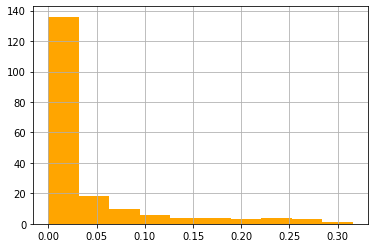

In [145]:
from ipywidgets import interact, interactive, fixed, interact_manual
def select_subject(subID):
    df_filtered= dataset_df[subID]
    ax = df_filtered.apply(np.sum).hist(color="orange")
subject = dataset_df.columns
interact(select_subject, subID=subject)

In [146]:
print("Model type:", inspector.model_type())
print("Number of trees:", inspector.num_trees())
print("Objective:", inspector.objective())
print("Input features:", inspector.features())

Model type: RANDOM_FOREST
Number of trees: 500
Objective: Classification(label=__LABEL, class=None, num_classes=7)
Input features: ["Alloprevotella" (1; #0), "Bacteroides" (1; #1), "Bifidobacterium" (1; #2), "Blautia" (1; #3), "Collinsella" (1; #4), "Coprococcus-Total" (1; #5), "Dialister" (1; #6), "Dorea" (1; #7), "Escherichia-Shigella" (1; #8), "Faecalibacterium" (1; #9), "Lachnospiraceae-Total" (1; #10), "Lactobacillus" (1; #11), "Other-Total" (1; #12), "Prevotella-Total" (1; #13), "Roseburia" (1; #14), "Ruminococcaceae-Total" (1; #15), "Ruminococcus-Total" (1; #16), "Streptococcus-total" (1; #17), "uncultured/unidentified-total" (1; #18)]


In [147]:
inspector.evaluation()

Evaluation(num_examples=189, accuracy=0.19576719576719576, loss=1.8761325701085663, rmse=None, ndcg=None, aucs=None)

In [148]:
for importance in inspector.variable_importances().keys():
  print("\t", importance)

	 MEAN_DECREASE_IN_AP_2_VS_OTHERS
	 MEAN_DECREASE_IN_PRAUC_5_VS_OTHERS
	 MEAN_DECREASE_IN_AUC_2_VS_OTHERS
	 MEAN_DECREASE_IN_ACCURACY
	 MEAN_DECREASE_IN_AP_1_VS_OTHERS
	 MEAN_DECREASE_IN_PRAUC_4_VS_OTHERS
	 MEAN_DECREASE_IN_AUC_1_VS_OTHERS
	 MEAN_DECREASE_IN_AP_5_VS_OTHERS
	 MEAN_DECREASE_IN_AUC_5_VS_OTHERS
	 MEAN_DECREASE_IN_PRAUC_3_VS_OTHERS
	 MEAN_DECREASE_IN_AP_4_VS_OTHERS
	 MEAN_DECREASE_IN_PRAUC_2_VS_OTHERS
	 MEAN_DECREASE_IN_AUC_4_VS_OTHERS
	 MEAN_DECREASE_IN_AP_3_VS_OTHERS
	 MEAN_DECREASE_IN_AUC_3_VS_OTHERS
	 MEAN_DECREASE_IN_PRAUC_1_VS_OTHERS
	 NUM_AS_ROOT


In [149]:
# Mean decrease in AUC of the class 1 vs the others.
inspector.variable_importances()["MEAN_DECREASE_IN_AUC_1_VS_OTHERS"]

[("uncultured/unidentified-total" (1; #18), 0.057848615697231515),
 ("Coprococcus-Total" (1; #5), -0.0017145034290068084),
 ("Bifidobacterium" (1; #2), -0.005334010668021416),
 ("Roseburia" (1; #14), -0.005461010922021892),
 ("Other-Total" (1; #12), -0.008953517907035802),
 ("Dialister" (1; #6), -0.011493522987046034),
 ("Blautia" (1; #3), -0.01314452628905266),
 ("Bacteroides" (1; #1), -0.013589027178054547),
 ("Ruminococcaceae-Total" (1; #15), -0.013970027940055696),
 ("Faecalibacterium" (1; #9), -0.016383032766065564),
 ("Alloprevotella" (1; #0), -0.01651003302006593),
 ("Collinsella" (1; #4), -0.016954533909067815),
 ("Streptococcus-total" (1; #17), -0.017081534163068623),
 ("Ruminococcus-Total" (1; #16), -0.018288036576073197),
 ("Dorea" (1; #7), -0.018542037084074148),
 ("Lachnospiraceae-Total" (1; #10), -0.021272542545085205),
 ("Prevotella-Total" (1; #13), -0.021399542799085625),
 ("Lactobacillus" (1; #11), -0.023495046990094137),
 ("Escherichia-Shigella" (1; #8), -0.0263525527

In [150]:
inspector.extract_tree(tree_idx=0)

Tree(NonLeafNode(condition=(uncultured/unidentified-total >= 0.004005628637969494; miss=True), pos_child=NonLeafNode(condition=(Alloprevotella >= 0.003357323817908764; miss=True), pos_child=NonLeafNode(condition=(Roseburia >= 0.016060752794146538; miss=True), pos_child=NonLeafNode(condition=(Other-Total >= 0.06574533879756927; miss=True), pos_child=NonLeafNode(condition=(Lachnospiraceae-Total >= 0.01758013665676117; miss=False), pos_child=LeafNode(value=ProbabilityValue([0.0, 0.0, 0.2, 0.0, 0.8],n=5.0)), neg_child=LeafNode(value=ProbabilityValue([0.0, 0.0, 0.0, 0.0, 1.0],n=17.0)), value=ProbabilityValue([0.0, 0.0, 0.045454545454545456, 0.0, 0.9545454545454546],n=22.0)), neg_child=LeafNode(value=ProbabilityValue([0.2, 0.0, 0.4, 0.2, 0.2],n=5.0)), value=ProbabilityValue([0.037037037037037035, 0.0, 0.1111111111111111, 0.037037037037037035, 0.8148148148148148],n=27.0)), neg_child=NonLeafNode(condition=(Bacteroides >= 0.0034175491891801357; miss=True), pos_child=LeafNode(value=ProbabilityVa

In [155]:
# number_of_use[F] will be the number of node using feature F in its condition.
number_of_use = collections.defaultdict(lambda: 0)

# Iterate over all the nodes in a Depth First Pre-order traversals.
for node_iter in inspector.iterate_on_nodes():

  if not isinstance(node_iter.node, tfdf.py_tree.node.NonLeafNode):
    # Skip the leaf nodes
    continue

  # Iterate over all the features used in the condition.
  # By default, models are "oblique" i.e. each node tests a single feature.
  for feature in node_iter.node.condition.features():
    number_of_use[feature] += 1

print("Number of condition nodes per features:")
for feature, count in number_of_use.items():
  print("\t", feature.name, ":", count,"\n")

Number of condition nodes per features:
	 uncultured/unidentified-total : 971 

	 Prevotella-Total : 551 

	 Coprococcus-Total : 660 

	 Blautia : 606 

	 Dorea : 718 

	 Lactobacillus : 673 

	 Faecalibacterium : 583 

	 Ruminococcus-Total : 484 

	 Collinsella : 649 

	 Ruminococcaceae-Total : 641 

	 Dialister : 586 

	 Bifidobacterium : 641 

	 Other-Total : 595 

	 Alloprevotella : 679 

	 Bacteroides : 600 

	 Lachnospiraceae-Total : 689 

	 Streptococcus-total : 620 

	 Roseburia : 954 

	 Escherichia-Shigella : 794 



In [152]:
%set_cell_height 150
model.make_inspector().training_logs()

<IPython.core.display.Javascript object>

[TrainLog(num_trees=1, evaluation=Evaluation(num_examples=65, accuracy=0.3384615384615385, loss=23.844261814997747, rmse=None, ndcg=None, aucs=None)),
 TrainLog(num_trees=11, evaluation=Evaluation(num_examples=188, accuracy=0.26595744680851063, loss=16.588557737621855, rmse=None, ndcg=None, aucs=None)),
 TrainLog(num_trees=21, evaluation=Evaluation(num_examples=189, accuracy=0.2698412698412698, loss=12.804496132428683, rmse=None, ndcg=None, aucs=None)),
 TrainLog(num_trees=32, evaluation=Evaluation(num_examples=189, accuracy=0.25925925925925924, loss=7.4931984328167145, rmse=None, ndcg=None, aucs=None)),
 TrainLog(num_trees=42, evaluation=Evaluation(num_examples=189, accuracy=0.23809523809523808, loss=5.542836261292298, rmse=None, ndcg=None, aucs=None)),
 TrainLog(num_trees=52, evaluation=Evaluation(num_examples=189, accuracy=0.21164021164021163, loss=4.498417726249764, rmse=None, ndcg=None, aucs=None)),
 TrainLog(num_trees=62, evaluation=Evaluation(num_examples=189, accuracy=0.2116402

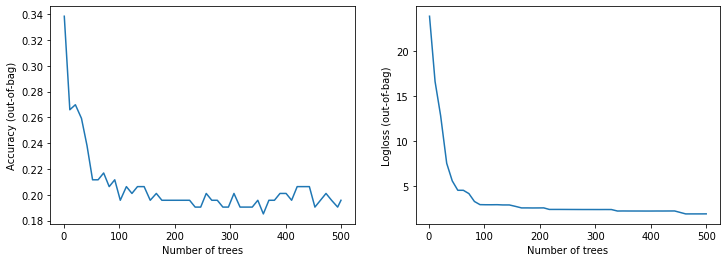

In [153]:
import matplotlib.pyplot as plt

logs = model.make_inspector().training_logs()

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot([log.num_trees for log in logs], [log.evaluation.accuracy for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("Accuracy (out-of-bag)")

plt.subplot(1, 2, 2)
plt.plot([log.num_trees for log in logs], [log.evaluation.loss for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("Logloss (out-of-bag)")

plt.show()

In [154]:
print(evaluation)

#print(f"MSE: {evaluation['mse']}")
#print(f"RMSE: {math.sqrt(evaluation['mse'])}")

{'loss': 0.0, 'accuracy': 0.6560846567153931}
